In [2]:
import numpy as np
import pandas as pd

#Understanding the system
import os
print(os.name)
print(os.getcwd())

#Looking at the dataset.
print("\n\n\n")
df = pd.read_csv("Absenteeism_at_work.csv")
print(df, "\n\n\n")
print(df.describe(), "\n\n\n")
print(df.info())

nt
C:\Users\exfmti\Desktop\Semester5\DataAnalytics\Assignments\Assignment6




     ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0    11                  26                 7                3        1   
1    36                   0                 7                3        1   
2     3                  23                 7                4        1   
3     7                   7                 7                5        1   
4    11                  23                 7                5        1   
5     3                  23                 7                6        1   
6    10                  22                 7                6        1   
7    20                  23                 7                6        1   
8    14                  19                 7                2        1   
9     1                  22                 7                2        1   
10   20                   1                 7                2        1   
11   20              

In [26]:
#Mean Shift Clustering

from sklearn.cluster import MeanShift
from sklearn.cluster import MeanShift, estimate_bandwidth
X = df

#Performing MeanShift Clustering
#bandwidth = estimate_bandwidth(X)
ms = MeanShift(bandwidth = 2.001, bin_seeding=True).fit(X) #Returns labels for each row(check using len(clustering))
labels = ms.labels_  #Retrive the labels for each datapoint
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("Estimated cluster centers : \n", cluster_centers, "\n")
print("Number of estimated clusters : %d" % n_clusters_, "\n")
print("Labels are : ", labels_unique)

Estimated cluster centers : 
 [[  28.      23.      12.       3.6      4.     225.      26.       9.
    28.     280.549   98.       0.       1.      24.       2.6  ]
 [  18.      10.       8.       4.       1.     330.      16.       4.
    28.     205.917   92.       0.       2.      25.       8.   ]
 [  28.      28.       2.       2.       2.     225.      26.       9.
    28.     302.585   99.       0.       1.      24.       2.   ]
 [  18.      18.       2.       2.       2.     330.      16.       4.
    28.     302.585   99.       0.       2.      25.       8.   ]
 [  28.      28.       4.       6.       3.     225.      26.       9.
    28.     326.452   96.       0.       1.      24.       2.   ]
 [  14.      12.       4.       4.       3.     155.      12.      14.
    34.     326.452   96.       0.       1.      25.      24.   ]
 [  34.      19.       1.       2.       2.     118.      10.      10.
    37.     330.061  100.       0.       1.      28.      32.   ]
 [  36.    

In [5]:
#DBSCAN

import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps = 8.5, min_samples = 5, metric = 'euclidean').fit(X)
#db = DBSCAN().fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 19


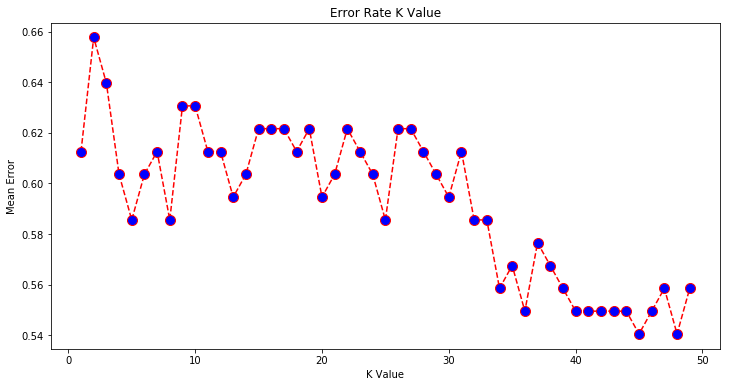

Accuracy =  0.4594594594594595 


Confusion matrix:
[[ 4  0  0  0  0  0  0  0  0]
 [ 0  4  3  1  0  2  0  0  0]
 [ 0  1 14  6  0  4  0  0  0]
 [ 0  0 12  4  1  4  0  0  0]
 [ 0  0  5  1  0  1  0  0  0]
 [ 0  1 11  3  0 25  0  0  0]
 [ 0  0  1  0  0  1  0  0  0]
 [ 0  0  0  0  0  1  0  0  0]
 [ 0  0  1  0  0  0  0  0  0]] 

 Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         4
          1       0.67      0.40      0.50        10
          2       0.30      0.56      0.39        25
          3       0.27      0.19      0.22        21
          4       0.00      0.00      0.00         7
          8       0.66      0.62      0.64        40
         16       0.00      0.00      0.00         2
         40       0.00      0.00      0.00         1
         64       0.00      0.00      0.00         1

avg / total       0.45      0.46      0.44       111



In [7]:
#KNN
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

X = df.iloc[:, :-1].values  
y = df.iloc[:, 14].values

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

from sklearn.neighbors import KNeighborsClassifier
# Calculating error for K values between 1 and 50
error = []
for i in range(1, 50):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')
plt.show()

index_min = np.argmin(error)
classifier = KNeighborsClassifier(n_neighbors = index_min+1)  
classifier.fit(X_train, y_train)  

y_pred = classifier.predict(X_test)  

count = 0
for i in range(len(y_pred)):
    if(y_pred[i] == y_test[i]):
        count += 1

print("Accuracy = ", count/len(y_pred), "\n\n")
        
from sklearn.metrics import classification_report, confusion_matrix 
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred),"\n\n Report:")  
print(classification_report(y_test, y_pred)) 

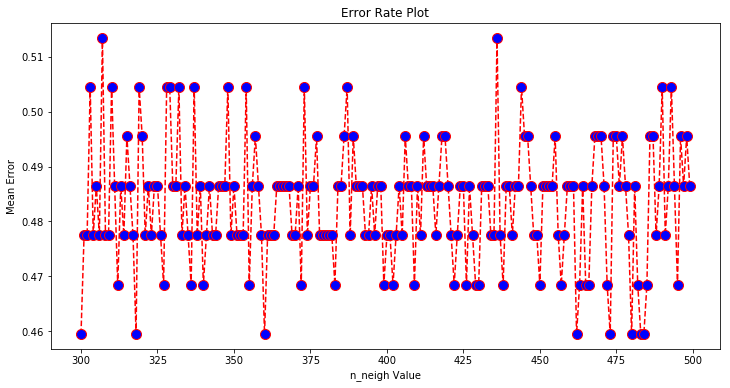

Accuracy: 0.522522522523


In [8]:
#Random Forest
# Import train_test_split function
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values  
y = df.iloc[:, 14].values

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

#Scaling the data
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Calculating error for n_estimators values between 300 and 500
error = []
for i in range(300, 500):  
    clf = RandomForestClassifier(n_estimators = i)
    clf.fit(X_train, y_train)
    pred_i = clf.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(300, 500), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Plot')  
plt.xlabel('n_estimators Value')  
plt.ylabel('Mean Error')
plt.show()

#Create a Gaussian Classifier
index_min = np.argmin(error)
clf=RandomForestClassifier(n_estimators = index_min+300)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [7]:
import pandas as pd
from sklearn.svm import SVC
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix


df = pd.read_csv("Absenteeism_at_work.csv")

X = df.iloc[:, :-1].values  
y = df.iloc[:, 14].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

#Scaling the data
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

#####Training, prediction
svclassifier = SVC(kernel='sigmoid')  
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test)  

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred), "\n\n")

from sklearn.metrics import classification_report, confusion_matrix 
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred),"\n\n Report:")  
print(classification_report(y_test, y_pred)) 

Accuracy: 0.441441441441 


Confusion matrix:
[[ 3  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  4  2  0  6  0  0  0  0  0]
 [ 0  2 20  1  0  5  0  0  0  0  0]
 [ 0  2  6  4  0  5  0  0  0  0  0]
 [ 0  1  6  0  0  5  0  0  0  0  0]
 [ 0  2  3  0  0 22  0  0  0  0  0]
 [ 0  0  2  0  0  2  0  0  0  0  0]
 [ 0  1  0  0  0  2  0  0  0  0  0]
 [ 0  0  1  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0]] 

 Report:
             precision    recall  f1-score   support

          0       1.00      0.75      0.86         4
          1       0.00      0.00      0.00        12
          2       0.48      0.71      0.57        28
          3       0.57      0.24      0.33        17
          4       0.00      0.00      0.00        12
          8       0.43      0.81      0.56        27
         16       0.00      0.00      0.00         4
         24       0.00      0.00      0.00         3
         40       0.00      0.00      0.00         2
         56    

C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
